In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM, Flatten
from keras_self_attention import SeqSelfAttention
from math import sqrt
import matplotlib.pyplot as plt

In [20]:
# Load the dataset
train1 = pd.read_csv('/home/disi/ff/Datasets/Dataset_2/Train1.csv')
train2 = pd.read_csv('/home/disi/ff/Datasets/Dataset_2/Train2.csv')
test = pd.read_csv('/home/disi/ff/Datasets/Dataset_2/Test.csv')

In [3]:
# Combine training data
train_data = pd.concat([train1, train2])

In [21]:
# Select relevant features
features = ['Temperature', 'Humidity', 'Light']  # Update these names based on actual column names in your CSV
train_data = pd.concat([train1[features], train2[features]])
X_train = train_data
y_train = train_data  # Predicting the same features
X_test = test[features]
y_test = test[features]

In [22]:
# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)


In [23]:
# Create sequences
time_steps = 5  # Number of time steps
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)


In [31]:
# Simplified LSTM model with attention
inputs = Input(shape=(time_steps, len(features)))
lstm = LSTM(64, return_sequences=True)(inputs)
attention = SeqSelfAttention(attention_activation='sigmoid')(lstm)
flatten = Flatten()(attention)
dense = Dense(50, activation='relu')(flatten)
dropout = Dropout(0.2)(dense)
output = Dense(len(features))(dropout)

/home/disi/anaconda3/envs/ff/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [32]:
model = Model(inputs=[inputs], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
# Model training
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20


271/271 [==============================] - 4s 6ms/step - loss: 0.0062 - val_loss: 7.7141e-04
Epoch 2/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 3.7341e-04
Epoch 3/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 5.9351e-04
Epoch 4/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 8.1062e-04
Epoch 5/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 3.7484e-04
Epoch 6/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0016 - val_loss: 3.7533e-04
Epoch 7/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss: 4.3128e-04
Epoch 8/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss: 4.0037e-04
Epoch 9/20
271/271 [==============================] - 1s 4ms/step - loss: 0.0014 - val_loss: 4.2927e-04
Epoch 10/20
271/271 [==============================] - 1s 5ms/step - loss: 

In [34]:
# Model evaluation
y_pred = model.predict(X_test_seq)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_seq, y_pred)

print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

305/305 [==============================] - 1s 2ms/step
Test MSE: 0.000
Test RMSE: 0.015
Test MAE: 0.009


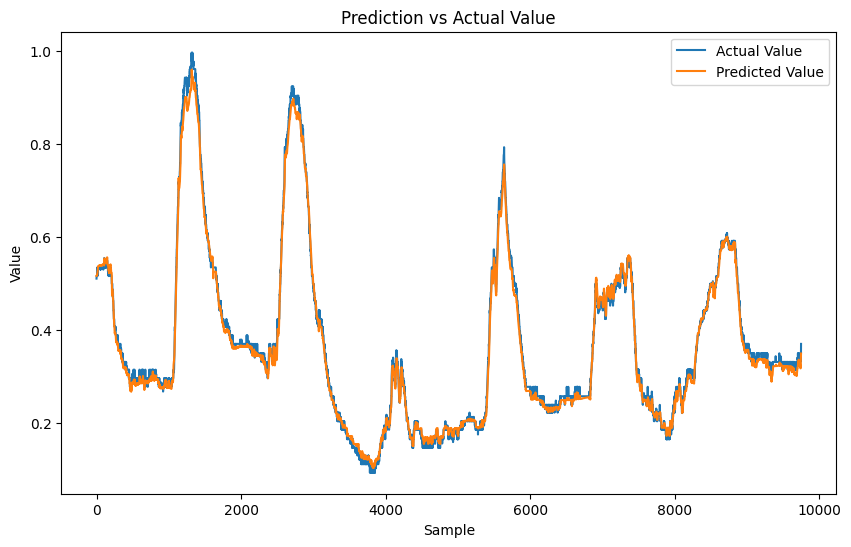

In [35]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq[:, 0], label='Actual Value')  # Modify to plot specific feature
plt.plot(y_pred[:, 0], label='Predicted Value')
plt.title('Prediction vs Actual Value')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()